# Is Advertising any good? 
## 4.4 SALES1

In [100]:
sales <- read.table("/Users/jmanderson/statistics/02_intro-to-regression/ARM by Iain - Exercises/data/sales1.csv", 
                           sep=",", header = T, stringsAsFactors = F)

In [101]:
head(sales)

,Sales,Advert,Interest
,<dbl>,<dbl>,<int>
1,4.0,3.5,5
2,6.0,5.5,5
3,8.0,7.0,5
4,2.0,1.0,4
5,4.5,3.0,4
6,9.0,6.5,4


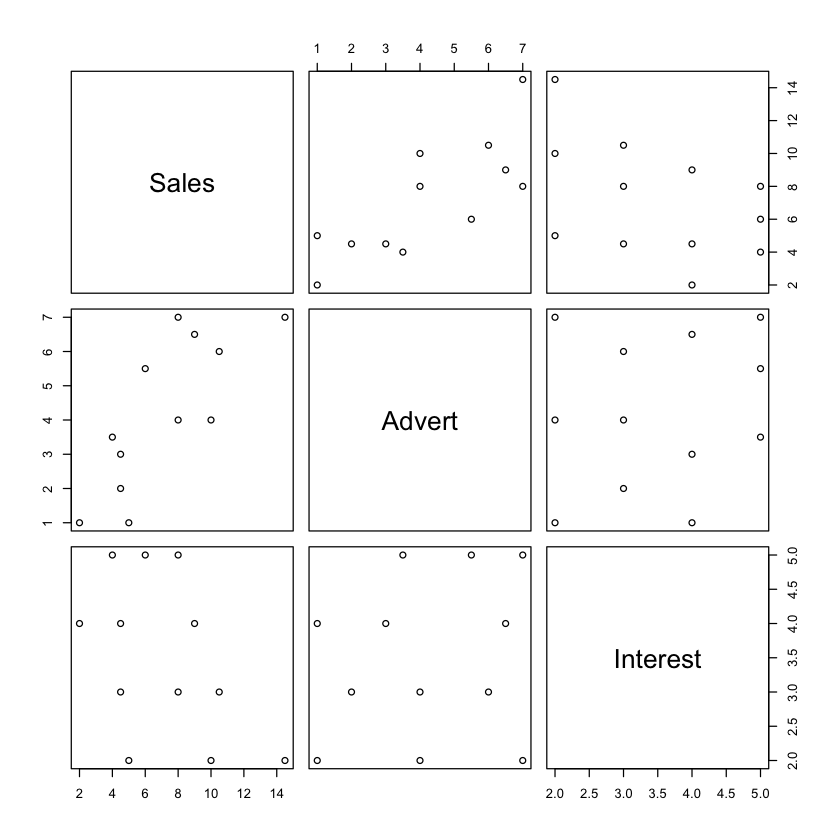

In [102]:
plot(sales)

## Interactions
But what if we suspected increase in Sales from Advertising efffects depends on the interest rate? 

Is it enough to add another term to the model? - No

If the effect of Advertising depends on the current interest rate, they are interacting, and we should include an **interaction term**.

If the interest rate effected Sales directly and not via an interaction we would just include that term.

The term is added as a standalone before the interaction term though, to preserve hirearchy, this is the same justification when adding quadratic terms to a model. 

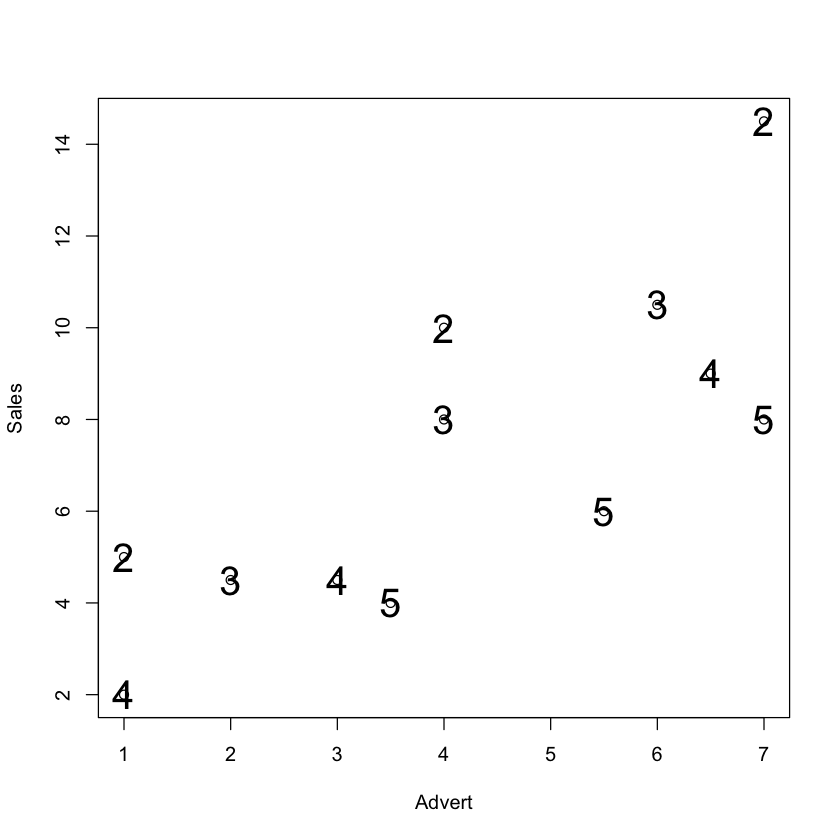

In [25]:
plot(Sales~Advert, sales)
text(Sales~Advert, labels=Interest, sales, cex=2)

In [103]:
lmSales <- lm(Sales~Advert+Interest+Advert*Interest, sales)
summary(lmSales)


Call:
lm(formula = Sales ~ Advert + Interest + Advert * Interest, data = sales)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42247 -0.20707  0.03773  0.16418  0.39588 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.94148    0.66169   8.979 1.88e-05 ***
Advert           1.83632    0.13492  13.611 8.17e-07 ***
Interest        -1.31187    0.19670  -6.669 0.000158 ***
Advert:Interest -0.12601    0.03864  -3.261 0.011507 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3075 on 8 degrees of freedom
Multiple R-squared:  0.9944,	Adjusted R-squared:  0.9923 
F-statistic: 472.1 on 3 and 8 DF,  p-value: 2.445e-09


In [104]:
lmPred <- cbind(sales, predict(lmSales, interval="confidence"))
lmPred

,Sales,Advert,Interest,fit,lwr,upr
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,4.0,3.5,5,3.604124,3.187454,4.020794
2,6.0,5.5,5,6.016682,5.652537,6.380827
3,8.0,7.0,5,7.826101,7.304394,8.347808
4,2.0,1.0,4,2.026300,1.549333,2.503266
5,4.5,3.0,4,4.690874,4.396657,4.985090
6,9.0,6.5,4,9.353879,9.036187,9.671570
7,4.5,2.0,3,4.922468,4.618412,5.226524
8,8.0,4.0,3,7.839058,7.614363,8.063753
9,10.5,6.0,3,10.755648,10.450814,11.060482


In [105]:
coefficients <- coef(lmSales)
names(coefficients) <- NULL

intercept <- coefficients[1]
advert <- coefficients[2]
interest <- coefficients[3]
adv_int <- coefficients[4]

sales_3mAds <- intercept + advert*3 + interest*3 + adv_int*(3*3)
sales_4mAds <- intercept + advert*4 + interest*3 + adv_int*(4*3)

sales_4mAds - sales_3mAds

[1] 1.458295

In other words: When the prevailing interest rate is 3%, we expect to increase sales by 1.46mill for each additional lm we spend on advertising